In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/HW1/heart.csv")

In [5]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
print("dataShape:",dataset.shape)

dataShape: (303, 14)


In [7]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
X = dataset.iloc[:,0:13].values
Y = dataset.iloc[:,13:14].values
x = dataset.iloc[:,0:13]
y = dataset.iloc[:,13:14]
print("X_shape:",x.shape)
print("Y_shape:",y.shape)

X_shape: (303, 13)
Y_shape: (303, 1)


In [9]:
print("attribute: \n")
for col in x.columns:
  print(col)
print("\n")
print("class:")
for col in y.columns:
  print(col)


attribute: 

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


class:
target


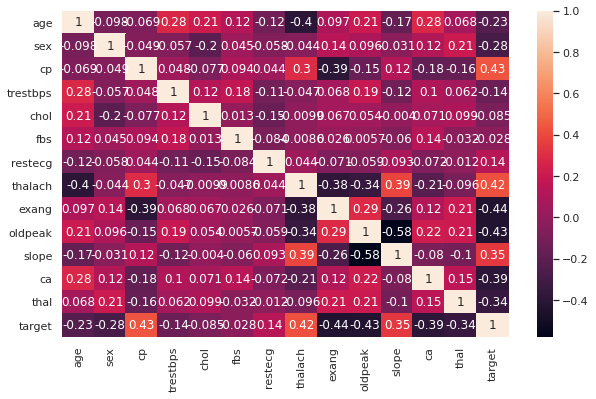

In [10]:
import seaborn as sn 
import matplotlib.pyplot as plt
sn.set(font_scale = 1)
sn.set_style("darkgrid")
fig_dims = (10,6) 
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)



In [15]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
# Predicting the test set result
y_pred_knn = knn.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test,y_pred_knn)
print(cm_knn)


[[21  6]
 [ 5 29]]


In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac_knn = accuracy_score(Y_test,y_pred_knn)
pc_knn = precision_score(Y_test,y_pred_knn)
rc_knn = recall_score(Y_test,y_pred_knn)
f1_knn = f1_score(Y_test,y_pred_knn)


In [23]:
print("accuracy_score   = ", ac_knn)
print("precision_score  = ",pc_knn)
print("recall_score     = ",rc_knn)
print("f1_score         = ",f1_knn)

accuracy_score   =  0.819672131147541
precision_score  =  0.8285714285714286
recall_score     =  0.8529411764705882
f1_score         =  0.8405797101449276


In [24]:

from sklearn.metrics import roc_curve,roc_auc_score
probability_knn = knn.predict_proba(X_test)
print(probability_knn)

[[1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.4 0.6]
 [0.  1. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]


In [25]:
prob_knn = probability_knn[:,1]

In [26]:
auc_knn = roc_auc_score(Y_test,prob_knn)
print("Roc_Auc = ",auc_knn)

Roc_Auc =  0.9172113289760349


In [27]:
fpr_knn, tpr_knn, _ = roc_curve(Y_test,prob_knn)

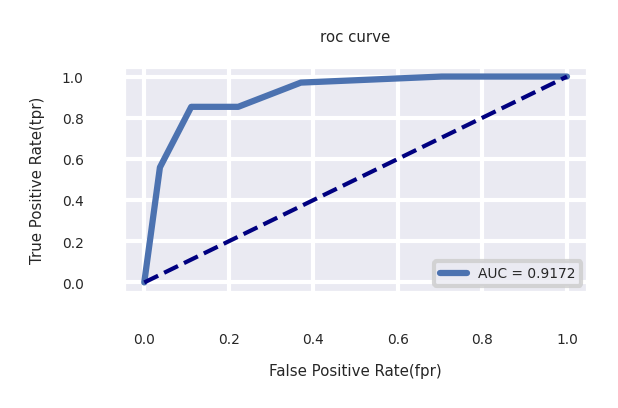

In [28]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_knn,tpr_knn, label = 'AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show()

#SVM


In [29]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', probability= True, random_state=0)
classifier_svm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
y_pred_svm = classifier_svm.predict(X_test)
print(y_pred_svm)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [31]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print(cm_svm)

[[21  6]
 [ 2 32]]


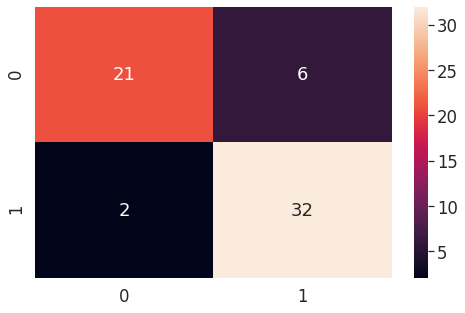

In [32]:
import seaborn as sn
sn.set(font_scale = 1.5)
sn.set_style("darkgrid")
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cm_svm,annot=True, ax=ax)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc_svm = accuracy_score(Y_test, y_pred_svm)
pc_svm = precision_score(Y_test, y_pred_svm)
rc_svm = recall_score(Y_test, y_pred_svm)
f1_svm =f1_score(Y_test,y_pred_svm)
print("Accuracy Score of Svm      = ",acc_svm)
print("Precision Score of Svm     = ",pc_svm)
print("Recall Score of Svm        =",rc_svm)
print("F1 Score of Svm            =",f1_svm)

Accuracy Score of Svm      =  0.8688524590163934
Precision Score of Svm     =  0.8421052631578947
Recall Score of Svm        = 0.9411764705882353
F1 Score of Svm            = 0.8888888888888888


In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
probability_svm = classifier_svm.predict_proba(X_test)
print(probability_svm)

[[0.88783001 0.11216999]
 [0.50545668 0.49454332]
 [0.47659766 0.52340234]
 [0.97148787 0.02851213]
 [0.89213663 0.10786337]
 [0.38122268 0.61877732]
 [0.81541698 0.18458302]
 [0.89155787 0.10844213]
 [0.81304346 0.18695654]
 [0.9276801  0.0723199 ]
 [0.30215255 0.69784745]
 [0.04584985 0.95415015]
 [0.94207369 0.05792631]
 [0.05733535 0.94266465]
 [0.06017613 0.93982387]
 [0.2499122  0.7500878 ]
 [0.78590932 0.21409068]
 [0.20591559 0.79408441]
 [0.95091086 0.04908914]
 [0.24854212 0.75145788]
 [0.10127133 0.89872867]
 [0.64712846 0.35287154]
 [0.84907502 0.15092498]
 [0.7731985  0.2268015 ]
 [0.09803906 0.90196094]
 [0.45433672 0.54566328]
 [0.82669494 0.17330506]
 [0.55556961 0.44443039]
 [0.06417762 0.93582238]
 [0.26280128 0.73719872]
 [0.31684505 0.68315495]
 [0.92535884 0.07464116]
 [0.04733723 0.95266277]
 [0.28395806 0.71604194]
 [0.08503536 0.91496464]
 [0.6205295  0.3794705 ]
 [0.91056536 0.08943464]
 [0.10173109 0.89826891]
 [0.88843112 0.11156888]
 [0.79748231 0.20251769]


In [35]:
prob_svm = probability_svm[:,1]
print(prob_svm)

[0.11216999 0.49454332 0.52340234 0.02851213 0.10786337 0.61877732
 0.18458302 0.10844213 0.18695654 0.0723199  0.69784745 0.95415015
 0.05792631 0.94266465 0.93982387 0.7500878  0.21409068 0.79408441
 0.04908914 0.75145788 0.89872867 0.35287154 0.15092498 0.2268015
 0.90196094 0.54566328 0.17330506 0.44443039 0.93582238 0.73719872
 0.68315495 0.07464116 0.95266277 0.71604194 0.91496464 0.3794705
 0.08943464 0.89826891 0.11156888 0.20251769 0.74728321 0.80637114
 0.66592591 0.16561266 0.59307519 0.61767657 0.90477419 0.5363159
 0.13672375 0.85246251 0.9174083  0.57950174 0.95483084 0.72274295
 0.90655275 0.13795416 0.91062283 0.90682146 0.844728   0.97106113
 0.86322692]


In [36]:
roc_auc_svm = roc_auc_score(Y_test,prob_svm)
print("Roc Auc Score of SVM = ", roc_auc_svm)

Roc Auc Score of SVM =  0.9291938997821351


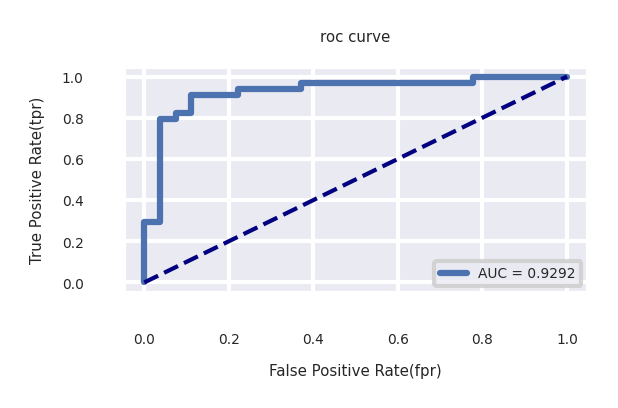

In [37]:
fpr_svm,tpr_svm, _ = roc_curve(Y_test,prob_svm)
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_svm,tpr_svm, label = 'AUC = %0.4f' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion= 'entropy', random_state= 0, min_samples_leaf= 5, max_depth= 3, max_leaf_nodes= 1000)

In [39]:
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
y_pred_dt = classifier_dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [41]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test, y_pred_dt)
print(cm_dt)

[[23  4]
 [ 7 27]]


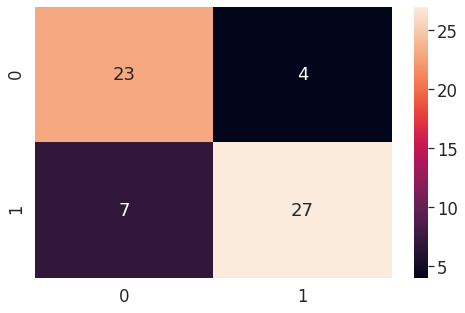

In [39]:

import seaborn as sn
sn.set(font_scale= 1.5)
sn.set_style("darkgrid")
fig_dims = (8,5)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(cm_dt, annot= True, ax=ax)
plt.show()


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_pred_dt)
pre = precision_score(Y_test, y_pred_dt)
re  = recall_score(Y_test, y_pred_dt)
f1  = f1_score(Y_test, y_pred_dt)
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Accuracy    = 0.819672131147541
Precison    = 0.8709677419354839
Recall      = 0.7941176470588235
f1 score    = 0.8307692307692308


In [43]:
from sklearn.metrics import roc_curve,roc_auc_score
probability_dt = classifier_dt.predict_proba(X_test)
print(probability_dt)

[[0.76190476 0.23809524]
 [0.5862069  0.4137931 ]
 [0.5862069  0.4137931 ]
 [1.         0.        ]
 [0.5862069  0.4137931 ]
 [0.76190476 0.23809524]
 [0.76190476 0.23809524]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.5862069  0.4137931 ]
 [0.24242424 0.75757576]
 [0.8125     0.1875    ]
 [0.18367347 0.81632653]
 [0.         1.        ]
 [0.18367347 0.81632653]
 [1.         0.        ]
 [0.18367347 0.81632653]
 [1.         0.        ]
 [0.18367347 0.81632653]
 [0.24242424 0.75757576]
 [0.76190476 0.23809524]
 [0.5862069  0.4137931 ]
 [1.         0.        ]
 [0.18367347 0.81632653]
 [0.         1.        ]
 [1.         0.        ]
 [0.76190476 0.23809524]
 [0.         1.        ]
 [0.18367347 0.81632653]
 [0.5862069  0.4137931 ]
 [1.         0.        ]
 [0.         1.        ]
 [0.18367347 0.81632653]
 [0.18367347 0.81632653]
 [0.24242424 0.75757576]
 [0.5862069  0.4137931 ]
 [0.18367347 0.81632653]
 [1.         0.        ]
 [1.         0.        ]


In [44]:
prob_dt = probability_dt[:,1]
roc_auc_dt = roc_auc_score(Y_test,prob_dt)
print("Roc Auc Score of DecisionTree = ", roc_auc_dt)

Roc Auc Score of DecisionTree =  0.8567538126361656


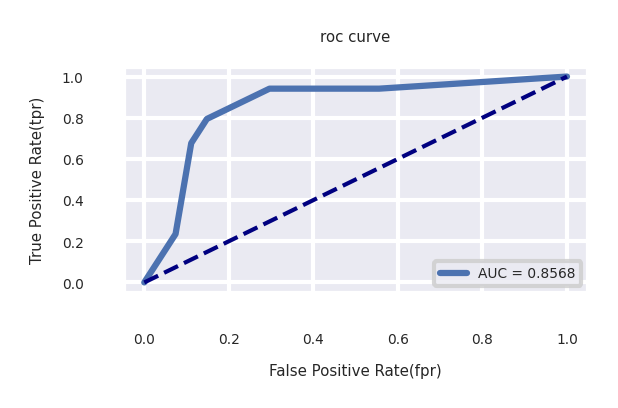

In [45]:
fpr_dt,tpr_dt, _ = roc_curve(Y_test,prob_dt)
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_dt,tpr_dt, label = 'AUC = %0.4f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state= 0)
classifier_lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred_lr = classifier_lr.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [48]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,y_pred_lr)
print(cm_lr)

[[21  6]
 [ 3 31]]


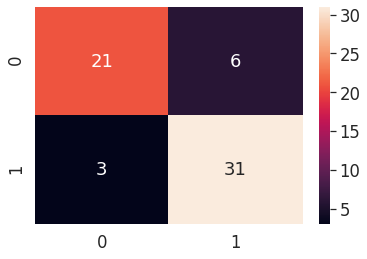

In [49]:
sn.set(font_scale = 1.5)
sn.heatmap(cm_lr,annot= True)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_pred_lr)
pre = precision_score(Y_test, y_pred_lr)
re  = recall_score(Y_test, y_pred_lr)
f1  = f1_score(Y_test, y_pred_lr)
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Accuracy    = 0.8524590163934426
Precison    = 0.8378378378378378
Recall      = 0.9117647058823529
f1 score    = 0.8732394366197184


In [51]:
from sklearn.metrics import roc_curve,roc_auc_score
probability_lr = classifier_lr.predict_proba(X_test)
print(probability_lr)

[[0.96352442 0.03647558]
 [0.20979439 0.79020561]
 [0.19949642 0.80050358]
 [0.98066823 0.01933177]
 [0.90342165 0.09657835]
 [0.55538003 0.44461997]
 [0.92147062 0.07852938]
 [0.88956164 0.11043836]
 [0.99510235 0.00489765]
 [0.99719892 0.00280108]
 [0.2526696  0.7473304 ]
 [0.05207707 0.94792293]
 [0.96625882 0.03374118]
 [0.15679226 0.84320774]
 [0.02752602 0.97247398]
 [0.31002421 0.68997579]
 [0.93388588 0.06611412]
 [0.29178293 0.70821707]
 [0.99324892 0.00675108]
 [0.17089791 0.82910209]
 [0.17770503 0.82229497]
 [0.64510213 0.35489787]
 [0.90813963 0.09186037]
 [0.87334986 0.12665014]
 [0.11389315 0.88610685]
 [0.39356301 0.60643699]
 [0.82283313 0.17716687]
 [0.6153007  0.3846993 ]
 [0.01498993 0.98501007]
 [0.34039085 0.65960915]
 [0.36066143 0.63933857]
 [0.98661008 0.01338992]
 [0.02652493 0.97347507]
 [0.26967879 0.73032121]
 [0.06754804 0.93245196]
 [0.32216514 0.67783486]
 [0.9693034  0.0306966 ]
 [0.15785415 0.84214585]
 [0.92801316 0.07198684]
 [0.84009868 0.15990132]


In [52]:
prob_lr = probability_lr[:,1]
roc_auc_lr = roc_auc_score(Y_test,prob_lr)
print("Roc Auc Score of LogisticRegression = ", roc_auc_lr)

Roc Auc Score of LogisticRegression =  0.9106753812636165


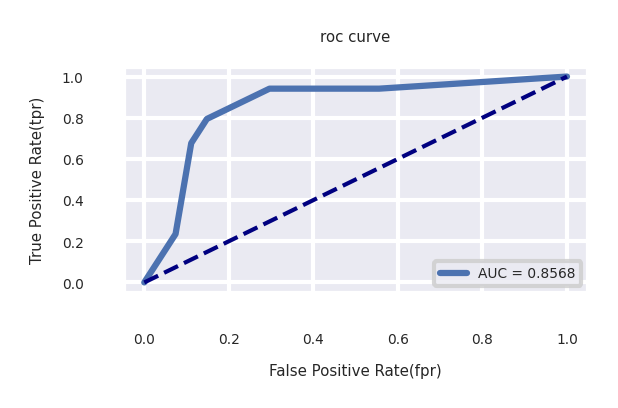

In [53]:
fpr_lr,tpr_lr, _ = roc_curve(Y_test,prob_dt)
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_dt,tpr_dt, label = 'AUC = %0.4f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 

# Random Forest

In [54]:
M = dataset.iloc[:,0:13].values
N = dataset.iloc[:,13:14].values

In [55]:
from sklearn.model_selection import train_test_split
M_train,M_test,N_train,N_test = train_test_split(M, N, test_size = 0.2, random_state = 0)

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 10)
classifier_rf.fit(M_train,N_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
y_pred_rf = classifier_rf.predict(M_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(N_test,y_pred_rf)
print(cm_rf)

[[23  4]
 [ 5 29]]


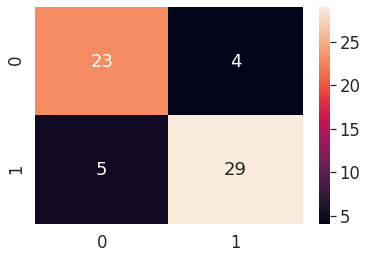

In [60]:
sn.set(font_scale=1.5)
sn.heatmap(cm_rf, annot = True)
plt.show()

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac  = accuracy_score(N_test, y_pred_rf)
pre = precision_score(N_test, y_pred_rf)
re  = recall_score(N_test, y_pred_rf)
f1  = f1_score(N_test, y_pred_rf)
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)


Accuracy    = 0.8524590163934426
Precison    = 0.8787878787878788
Recall      = 0.8529411764705882
f1 score    = 0.8656716417910447


In [62]:

from sklearn.metrics import roc_auc_score,roc_curve
probability_rf = classifier_rf.predict_proba(M_test)
prob_rf = probability_rf[:,1]
roc_auc_rf = roc_auc_score(N_test,prob_rf)
print("Roc Auc Score of RandomForestRegression = ", roc_auc_rf)


Roc Auc Score of RandomForestRegression =  0.9199346405228759


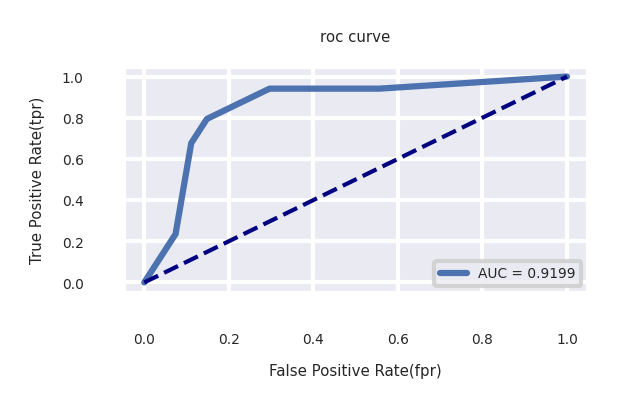

In [63]:
fpr_rf,tpr_rf, _ = roc_curve(N_test,prob_rf)
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_dt,tpr_dt, label = 'AUC = %0.4f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 

# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(M_train,N_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
y_pred_nb = classifier_nb.predict(M_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(N_test,y_pred_nb)
print(cm_nb)

[[21  6]
 [ 3 31]]


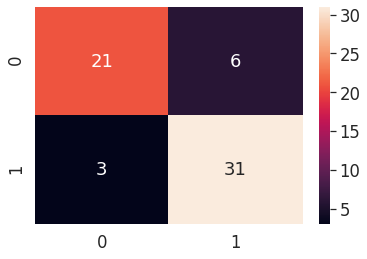

In [67]:
sn.set(font_scale=1.5)
sn.heatmap(cm_nb, annot = True)
plt.show()

In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac  = accuracy_score(N_test, y_pred_nb)
pre = precision_score(N_test, y_pred_nb)
re  = recall_score(N_test, y_pred_nb)
f1  = f1_score(N_test, y_pred_nb)
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Accuracy    = 0.8524590163934426
Precison    = 0.8378378378378378
Recall      = 0.9117647058823529
f1 score    = 0.8732394366197184


Roc Auc Score of RandomForestRegression =  0.9074074074074074


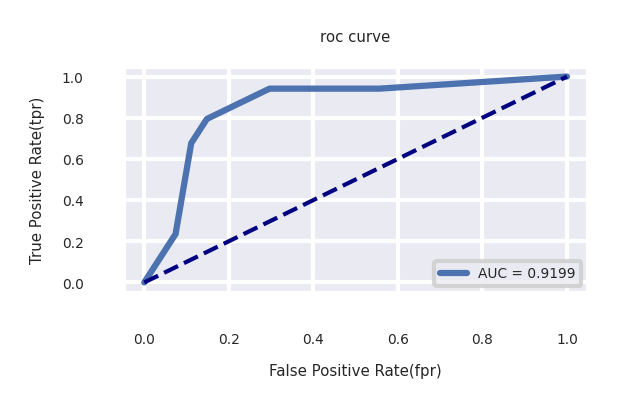

In [70]:
from sklearn.metrics import roc_auc_score,roc_curve
probability_nb = classifier_nb.predict_proba(M_test)
prob_nb = probability_nb[:,1]
roc_auc_nb = roc_auc_score(N_test,prob_nb)
print("Roc Auc Score of RandomForestRegression = ", roc_auc_nb)
fpr_nb,tpr_nb, _ = roc_curve(N_test,prob_nb)
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_dt,tpr_dt, label = 'AUC = %0.4f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 

# Plotting the roc curve for all algorithm

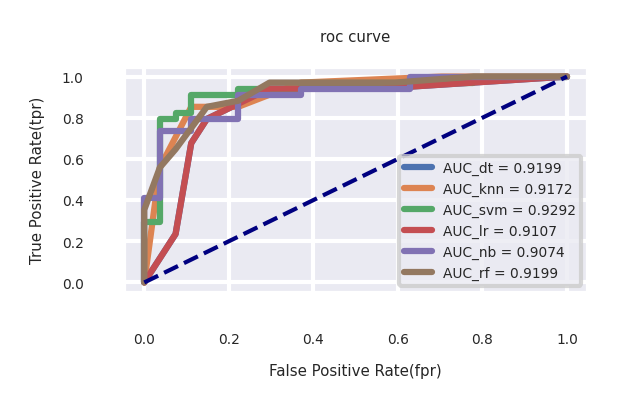

In [71]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale= 0.3)
sn.set_style("darkgrid")
plt.plot(fpr_dt,tpr_dt, label = 'AUC_dt = %0.4f' % roc_auc_rf)
plt.plot(fpr_knn,tpr_knn, label = 'AUC_knn = %0.4f' % auc_knn)
plt.plot(fpr_svm,tpr_svm, label = 'AUC_svm = %0.4f' % roc_auc_svm)
plt.plot(fpr_lr,tpr_lr, label = 'AUC_lr = %0.4f' % roc_auc_lr)
plt.plot(fpr_nb,tpr_nb, label = 'AUC_nb = %0.4f' % roc_auc_nb)
plt.plot(fpr_rf,tpr_rf, label = 'AUC_rf = %0.4f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.title("roc curve")
plt.xlabel("False Positive Rate(fpr)")
plt.ylabel("True Positive Rate(tpr)")
plt.legend(loc="lower right")
plt.show() 
